# Initial exploration of data

## Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

In [62]:
def dfSummary(df):
    print('Data Types:\n{0}\n'.format(df.dtypes))
    print('Dimensions:\n{0}\n'.format(df.shape))
    print('Columns:\n{0}\n'.format(df.columns.values))
    print('Data Head:\n{0}\n'.format(df.head()))

## Company NAIC

### Prep

In [47]:
df =  pd.read_csv('../data/Company_NAIC.csv')

In [63]:
dfSummary(df)

Data Types:
Company Name     object
NAIC            float64
dtype: object

Dimensions:
(430, 2)

Columns:
['Company Name' 'NAIC']

Data Head:
                                   Company Name     NAIC
0  SAVERS PROPERTY & CASUALTY INSURANCE COMPANY  16551.0
1                        CENTURY SURETY COMPANY  36951.0
2           PACIFIC EMPLOYERS INSURANCE COMPANY  22748.0
3                 CAPITOL INDEMNITY CORPORATION  10472.0
4        AMALGAMATED CASUALTY INSURANCE COMPANY  13293.0



### Cleaning

In [50]:
def cleanNumeric(row):
    x = row['NAIC']
    y = x.strip() if not isinstance(row['NAIC'], float) else x
    return y

def cleanCompanyNAIC(d):
    d.drop(['Unnamed: 0'], axis=1, inplace=True)
    d['NAIC'] = d.apply(cleanNumeric, axis=1)
    d['NAIC'] = pd.to_numeric(d['NAIC'])
    return d

In [51]:
df = cleanCompanyNAIC(df)
dfSummary(df)

Company Name     object
NAIC            float64
dtype: object
(430, 2)
                                   Company Name     NAIC
0  SAVERS PROPERTY & CASUALTY INSURANCE COMPANY  16551.0
1                        CENTURY SURETY COMPANY  36951.0
2           PACIFIC EMPLOYERS INSURANCE COMPANY  22748.0
3                 CAPITOL INDEMNITY CORPORATION  10472.0
4        AMALGAMATED CASUALTY INSURANCE COMPANY  13293.0


### Summary and Visualisation

In [65]:
df['NAIC'].max()

72222.0

In [66]:
df['NAIC'].min()

10014.0

In [68]:
missingNAIC = df['NAIC'].isna().sum()
print('Number of missing NAICs: {0}'.format(missingNAIC))

Number of missing NAICs: 26


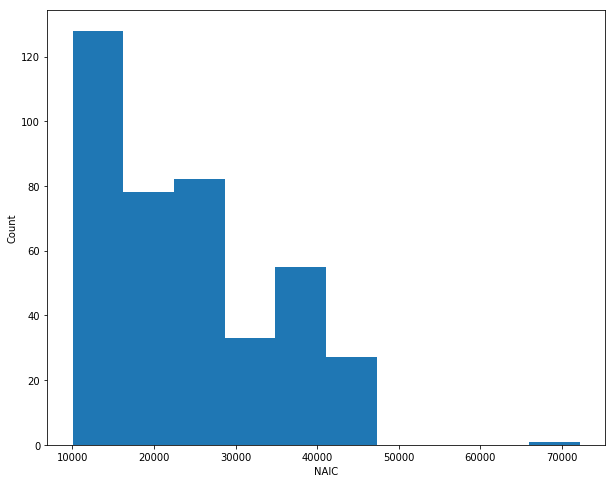

In [73]:
plt.figure(figsize=(10,8))
plt.hist(df['NAIC'])
plt.xlabel('NAIC')
plt.ylabel('Count')
plt.show()

In [74]:
del df

## Complaints and Product Share

### Prep

In [76]:
df = pd.read_csv('../data/Complaints and Product Share.csv')

In [77]:
dfSummary(df)

Data Types:
Unnamed: 0                     int64
Company Name                  object
NAIC Code                      int64
Product type                  object
Number of Complaints         float64
Share of product type        float64
Premium                      float64
Premium % of product type    float64
dtype: object

Dimensions:
(1102, 8)

Columns:
['Unnamed: 0' 'Company Name' 'NAIC Code' 'Product type'
 'Number of Complaints' 'Share of product type' 'Premium'
 'Premium % of product type']

Data Head:
   Unnamed: 0                Company Name  NAIC Code      Product type  \
0           0  PROGRESSIVE EXPRESS INS CO      10193  Commercial Auto    
1           1          AUTO OWNERS INS CO      18988  Commercial Auto    
2           2            WESTFIELD INS CO      24112  Commercial Auto    
3           3          ZURICH AMER INS CO      16535  Commercial Auto    
4           4               OWNERS INS CO      32700  Commercial Auto    

   Number of Complaints  Share of product ty

### Cleaning

In [78]:
def cleanComplaints(d):
    d.drop(['Unnamed: 0'], axis=1, inplace=True)
    d['Product type'] = d['Product type'].astype('category')
    return d

In [79]:
df = cleanComplaints(df)
dfSummary(df)

Data Types:
Company Name                   object
NAIC Code                       int64
Product type                 category
Number of Complaints          float64
Share of product type         float64
Premium                       float64
Premium % of product type     float64
dtype: object

Dimensions:
(1102, 7)

Columns:
['Company Name' 'NAIC Code' 'Product type' 'Number of Complaints'
 'Share of product type' 'Premium' 'Premium % of product type']

Data Head:
                 Company Name  NAIC Code      Product type  \
0  PROGRESSIVE EXPRESS INS CO      10193  Commercial Auto    
1          AUTO OWNERS INS CO      18988  Commercial Auto    
2            WESTFIELD INS CO      24112  Commercial Auto    
3          ZURICH AMER INS CO      16535  Commercial Auto    
4               OWNERS INS CO      32700  Commercial Auto    

   Number of Complaints  Share of product type      Premium  \
0                  44.0                   22.6  358506664.0   
1                   2.0           

### Summmary and Visualisation

In [86]:
columnNames = df.columns.values

In [93]:
def makeHist(d, c):
    plt.figure(figsize=(8,8))
    plt.hist(d[c], bins=15)
    plt.xlabel(c)
    plt.ylabel('Count')
    plt.show()

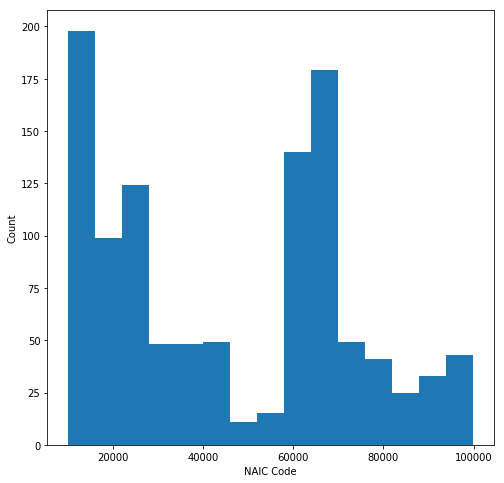

/home/ksuchak1990/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/ksuchak1990/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


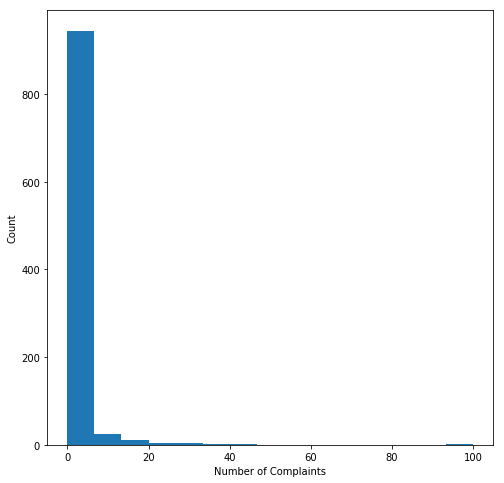

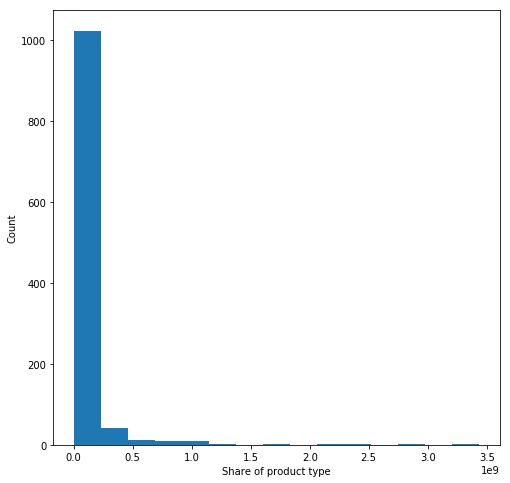

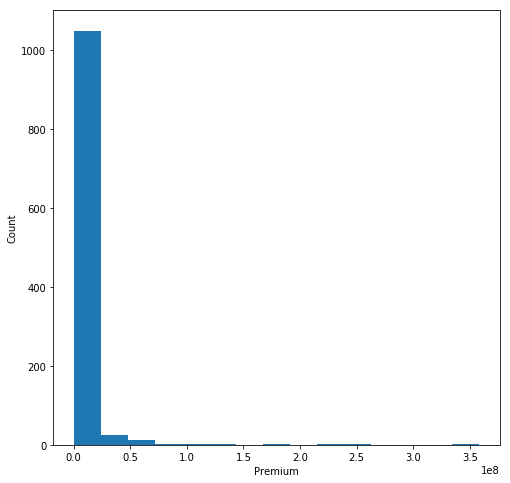

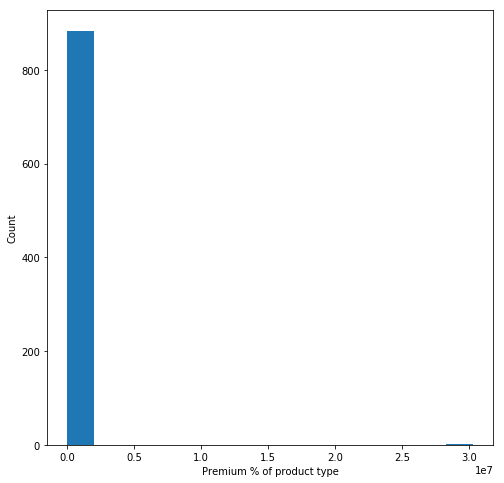

In [94]:
for c in columnNames:
    t = df[c].dtypes
    if pd.api.types.is_numeric_dtype(t):
        makeHist(df, c)      